In [69]:
import sys
sys.path.insert(1, "/data/drive/postdoc/Project4_covid/covid-fear/scripts/lib/hoeffding")
from XtendedCorrel import hoeffding
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import correlation as Dcorr

## Comparing Pearson's, Spearman's, distance correlation and Hoeffding correlations
### Generate data 

In [62]:
x = np.random.normal(0, 5, 1000)
x2=np.random.uniform(-5,5, 1000)

y = x+np.random.normal(0,2, 1000)

y4 = np.log(x+np.random.normal(0,2, 1000))

y2 = np.log(np.random.normal(0.5, 1, 1000)+np.random.normal(0,2, 1000))

y3 = (x2+np.random.normal(0,1, 1000))**2

y5 = np.sin(x+np.random.normal(0,0.2, 1000))

df = pd.DataFrame({'x': x,
                   'x2': x2,
                   'y': y,
                   'y2': y2,
                   'y3': y3,
                   'y4': y4, 
                   'y5': y5})

/home/ondrej/.conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/home/ondrej/.conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


x        x2          y        y2         y3        y4        y5
0    11.314836  0.519664   8.520296 -1.367356   1.125008  2.385805 -0.876354
1     1.620572 -4.937372   1.154954  0.032846   8.907078  1.393076  0.985366
2     0.089542  0.712751   1.835097  0.212358   0.410188       NaN  0.043447
3     3.582972  3.894541   6.533414  1.692948  10.396055  1.544791 -0.667356
4     5.664600 -1.149191   4.621409  1.217138   3.224132  1.427467 -0.073866
..         ...       ...        ...       ...        ...       ...       ...
995   2.463431 -0.699924   1.565643       NaN   0.257400  0.762077  0.675705
996   6.735198 -4.292883   5.248461  0.187163  14.105789  1.548934  0.296275
997  13.026243 -0.447613  16.791310  1.012133   0.230312  2.536260  0.471089
998  -0.730704  4.977421  -3.302308       NaN  27.274673       NaN -0.718314
999   9.797758 -0.444099  10.025474       NaN   1.169442  2.209457 -0.242395

[1000 rows x 7 columns]

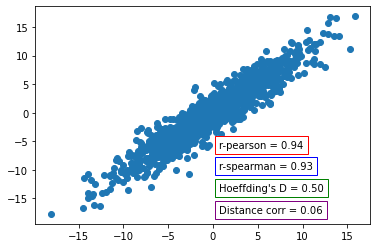

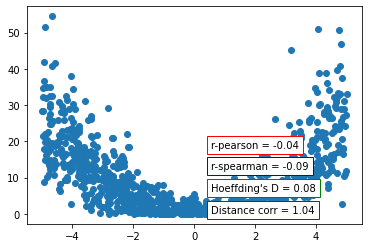

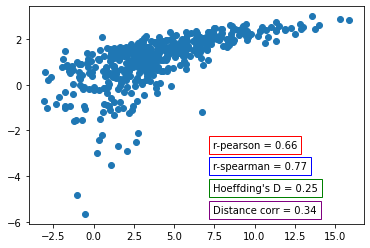

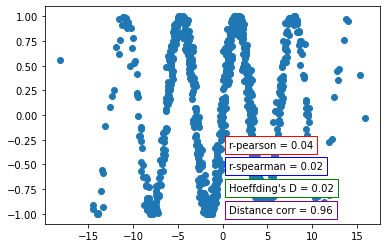

In [73]:

for y,x in zip(['y', 'y3', 'y4', 'y5'],['x', 'x2', 'x', 'x']):
    tdf = df[[x, y]].dropna()
    #tdf[y][np.isnan(tdf[y])] = np.median(tdf[y][~np.isnan(tdf[y])])
    plt.figure()
    plt.scatter(tdf[x], tdf[y])
    r,p = pearsonr(tdf[x], tdf[y])
    ax = plt.gca()

    t = plt.text(0.55, 0.35, "r-pearson = {:.2f}".format(r), transform=ax.transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='red'))
    
    r,p = spearmanr(tdf[x], tdf[y])
    ax = plt.gca()
    t = plt.text(0.55, 0.25, "r-spearman = {:.2f}".format(r), transform=ax.transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='blue'))

    
    d = hoeffding(np.array(tdf[x]), np.array(tdf[y]))
    ax = plt.gca()
    t = plt.text(0.55, 0.15, "Hoeffding's D = {:.2f}".format(d), transform=ax.transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='green'))
    
    r = Dcorr(np.array(tdf[x]), np.array(tdf[y]))
    ax = plt.gca()
    t = plt.text(0.55, 0.05, "Distance corr = {:.2f}".format(r), transform=ax.transAxes, fontsize=10)
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='purple'))
    



    